# Équations différentielles - Résolutions exactes 

Les équations différentielles ordinaires se résolvent souvent par approximations numériques comme nous le verrons plus tard.

On    peut    préférer    résoudre   les    équations    différentielles
exactement.  Sage  peut  alors  parfois  y  aider  en  donnant
directement une réponse formelle comme nous le verrons dans ce chapitre

Dans la plupart  des cas, il faudra passer par  une manipulation savante
de  ces équations  pour aider  Sage. Il  faudra veiller
à garder en tête  que la solution attendue  d'une équation
différentielle  est   une  *fonction*  dérivable  sur   un  certain
intervalle  mais que  Sage, lui,  manipule des *expressions* sans
domaine de  définition. La machine  aura donc besoin  d'une intervention
humaine pour aller vers une solution rigoureuse.

On  rappelle qu'une  *équation  différentielle ordinaire*  (parfois
notée EDO, ou ODE en anglais)
 est une équation faisant intervenir une fonction (inconnue) d’une seule
variable, ainsi qu’une ou plusieurs dérivées, successives ou non, de la fonction.

Dans l’équation $y'(x)+x\cdot y(x)=\sin(x)$
la fonction inconnue $y$ est appelée la *variable dépendante* et  la variable $x$ (par
rapport à laquelle $y$ varie) est appelée la *variable indépendante*.


Une *équation aux dérivées
partielles* (notée parfois EDP, ou PDE en anglais) fait intervenir
plusieurs variables indépendantes
ainsi que les dérivées partielles de la variable
dépendante par rapport à ces variables indépendantes.

Sauf mention contraire, **on considérera  dans ce chapitre des fonctions
d'une variable réelle**.

## Équations différentielles  ordinaires d'ordre  1

### Commandes de base

On voudrait résoudre une EDO d'ordre 1:
$$F(x,y(x),y'(x))=0.$$

On commence  par définir une variable  $x$ et une fonction  $y$ dépendant de
  cette variable:

In [1]:
x = var('x')
y = function('y')(x)

On utilise ensuite:
```
desolve(equation, variable, ics = ..., ivar = ..., show_method = ..., contrib_ode = ...)
```
* `equation` est l´EDO,l'égalité étant symbolisée par `==`

par exemple  l'équation $y'=2y+x$  s'écrit `diff(y,x) == 2*y+x`

* `variable` est le nom de la variable dépendante, c'est-à-dire
  la fonction $y$ dans $y'=2y+x$~
  
* `ics` est  un  argument optionnel  qui  permet d'indiquer  des
conditions initiales.  Pour  une équation du premier ordre,  on donne une
liste  [$x_0$,$y_0$],   pour  les   équations  du  second   ordre  c'est
[$x_0$,$y_0$,$x_1$,$y_1$] ou [$x_0$,$y_0$,$y'_0$]

* `ivar` est un argument  optionnel qui permet de  préciser la
variable  indépendante, c'est-à-dire  $x$ dans  $y'=2y+x$.  Cet argument
doit absolument être précisé  en cas d'équations dépendant de paramètres
comme par exemple $y'=ay+bx+c$

* `show_method` est un argument optionnel  fixé à `False`
par défaut.  Dans le  cas contraire,  il demande à  Sage de  préciser la
méthode  de  résolution  utilisée.  Les  termes  anglais  renvoyés peuvent
être
`linear`,   `separable`,   `exact`,   `homogeneous`,
`bernoulli`, `generalized homogeneous`. Sage renvoie alors une
liste  dont  le premier  argument  est la  solution  et  le deuxième  la
méthode

* `contrib_ode` est un  argument optionnel  par défaut  fixé à
`False`. Dans le cas contraire, `desolve` pourra s'occuper des
équations de Riccati, Lagrange, Clairaut et d'autres cas pathologiques mais cela
ralentit l'exécution.

### Équations  du premier  ordre  pouvant  être résolues  directement par Sage

Nous allons étudier dans cette section comment résoudre avecSage
les équations linéaires,
les équations à variables séparables,
les équations de Bernoulli,
les équations homogènes,
les équations exactes,
ainsi que
les équations de Riccati, Lagrange et Clairaut.

#### Équations linéaires

Il s'agit d'équations du
  type $$y'+P(x)y=Q(x),$$ où $P$ et $Q$ sont des fonctionscontinues sur des
  intervalles donnés.


In [7]:
%display latex
x = var('x'); y = function('y')(x)
desolve(diff(y,x) + 3*y == exp(x), y, show_method=True)

[1/4*(4*_C + e^(4*x))*e^(-3*x), 'linear']

#### Équations à variables séparables.

Il s'agit d'équations du
  type $$P(x)=y'Q(y),$$ où $P$ et $Q$ sont des fonctions continues sur des
  intervalles donnés.

In [5]:
desolve(y*diff(y,x) == x, y, show_method=True)

[1/2*y(x)^2 == 1/2*x^2 + _C, 'separable']

#### Équations de Bernoulli.

Il s'agit d'équations du
  type $$y'+P(x)y=Q(x)y^{\alpha},$$ où $P$ et $Q$ sont des fonctions continues sur des
  intervalles donnés et $\alpha\not\in \bigl\{ 0, 1 \bigr\}$.
  
  Exemple:  $y'-y=xy^4$.

In [6]:
desolve(diff(y,x)-y == x*y^4, y, show_method=True)

[e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3), 'bernoulli']

#### Équations homogènes.

Il s'agit d'équations du
  type  $$y'=\frac{P(x,y)}{Q(x,y)},$$  où  $P$  et $Q$ sont des  fonctions
  homogènes de même degré sur des
  intervalles donnés.
  
  Par exemple  $x^2y'=y^2+xy+x^2$.

In [8]:
 desolve(x^2*diff(y,x) == y^2+x*y+x^2, y, show_method=True)

[_C*x == e^(arctan(y(x)/x)), 'homogeneous']

Les solutions  ne sont  pas données de  manière explicite.  Nous verrons
  plus loin comment se débrouiller dans certains cas.

### Exemples classiques

#### Équation linéaire

Résolvons par exemple $y'+2y=x^2-2x+3$:

In [16]:
DE = diff(y,x)+2*y == x**2-2*x+3
desolve(DE, y)

1/4*((2*x^2 - 2*x + 1)*e^(2*x) - 2*(2*x - 1)*e^(2*x) + 4*_C + 6*e^(2*x))*e^(-2*x)

Ordonnons un peu tout ça avec la commande `expand`

In [17]:
desolve(DE, y).expand()

1/2*x^2 + _C*e^(-2*x) - 3/2*x + 9/4

Ajoutons des conditions initiales, par exemple $y(0)=1$:

In [18]:
desolve(DE, y, ics=[0,1]).expand()

1/2*x^2 - 3/2*x - 5/4*e^(-2*x) + 9/4

#### Équations à variables séparables

Étudions l'équation $y'\log(y)=y\sin(x)$:

In [28]:
ed = desolve(diff(y,x)*log(y) == y*sin(x), y)
ed

1/2*log(y(x))^2 == _C - cos(x)

Ici $y(x)$ n'est pas donné de manière explicite. On peut demander une expression  de $y(x)$ en utilisant `solve`. On
fera attention à la nature de `ed` et de `y`:

In [29]:
solve(ed, y)

[y(x) == e^(-sqrt(2*_C - 2*cos(x))), y(x) == e^(sqrt(2*_C - 2*cos(x)))]

Pour avoir l'allure des courbes des solutions, il nous faut récupérer le
membre de droite  de chaque solution avec la  commande `rhs()`. Par
exemple, pour  obtenir le  membre de droite  de la première  solution en
remplaçant $\_C$ par 5:

In [30]:
 solve(ed, y)[0].substitute(_C==5).rhs()

NameError: name '_C' is not defined

En effet, nous n'avons pas défini
$\_C$: c'est Sage qui l'a
introduit. Pour  accéder à $\_C$, nous pouvons utiliser `variables()`
qui donne la liste des variables d'une expression:

In [31]:
ed.variables()

(_C, x)

Seules  $\_C$ et  $x$ sont  considérées comme  des variables  car $y$  a été
défini comme une fonction de la variable $x$.
On accède donc à $c$ avec `ed.variables()[0]`:

In [33]:
c = ed.variables()[0]
solve(ed, y)[0].substitute(c == 5).rhs()

e^(-sqrt(-2*cos(x) + 10))

 Pour avoir le tracé de la première solution avec $\_C=2$:

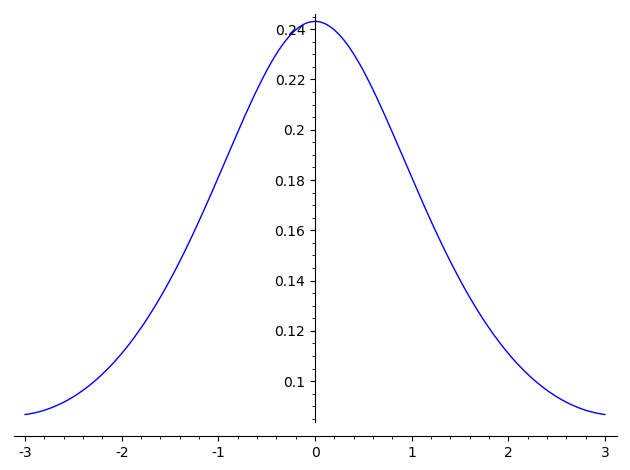

In [34]:
plot(solve(ed, y)[0].substitute(c == 2).rhs(), x, -3, 3)

In [35]:
P = Graphics()
for k in range(1,20,2):
    P += plot(solve(ed, y)[0].substitute(c==1+k/4).rhs(), x, -3, 3)

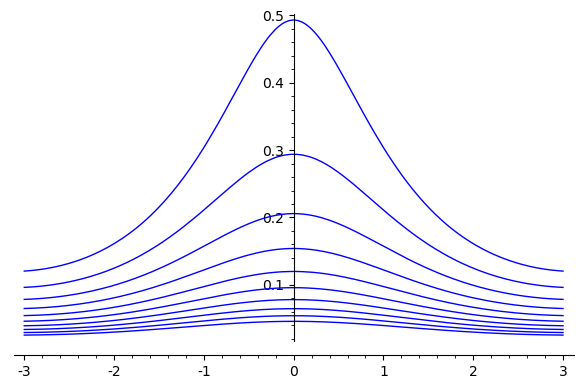

In [36]:
P

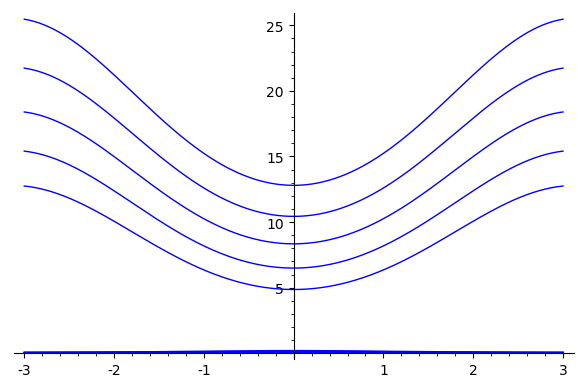

In [37]:
P = Graphics()
for j in [0,1]:
    for k in range(1,10,2):
        f = solve(ed,y)[j].substitute(c==2+0.25*k).rhs()
        P += plot(f, x, -3, 3)
P

## Exercice

Résolvez dans $\R$ les équations à variables séparables suivantes:
1. $(E_1):~\frac{yy'}{\sqrt{1+y^2}}=\sin(x)$
2. $(E_2):~y'=\frac{\sin(x)}{\cos(y)}$

## Systèmes différentiels linéaires

On veut résoudre le système différentiel suivant:

$$
\begin{cases}
    y'(x)=A\cdot y(x), \\
    y(0)=c
  \end{cases}
$$

avec

$$
\begin{align*}
  A&=\begin{bmatrix} 2&-2&0\\-2&0&2\\0&2&2\end{bmatrix}, &
  y(x)&=
  \begin{bmatrix}
    y_1(x)\\y_2(x)\\y_3(x)
  \end{bmatrix}, &
  c&=
  \begin{bmatrix}
    2\\1\\-2
  \end{bmatrix}.
\end{align*}
$$



In [38]:
x = var('x') 
y1 = function('y1')(x)
y2 = function('y2')(x) 
y3 = function('y3')(x)
y = vector([y1, y2, y3])
A = matrix([[2,-2,0],[-2,0,2],[0,2,2]])
system = [diff(y[i], x) - (A * y)[i] for i in range(3)]
desolve_system(system, [y1, y2, y3], ics=[0,2,1,-2])

[y1(x) == e^(4*x) + e^(-2*x),
 y2(x) == -e^(4*x) + 2*e^(-2*x),
 y3(x) == -e^(4*x) - e^(-2*x)]

## Exercice

Menez l'enquête sur le modèle de Lokta-Voltera